Prepare rules for the given data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 


In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
book=pd.read_csv("D:\\DATA SCIENCE\\DATA SCIENCE ASSIGNMENTS\\Assignments\\Association Rule\\book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [4]:
book.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Apriori algorithm

In [5]:
frequent_patterns=apriori(book,min_support=0.001,use_colnames=True)
frequent_patterns

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
2042,0.0015,"(YouthBks, ArtBks, ItalCook, CookBks, ChildBks..."
2043,0.0010,"(YouthBks, ArtBks, ItalCook, DoItYBks, ChildBk..."
2044,0.0010,"(ArtBks, ItalCook, CookBks, DoItYBks, ChildBks..."
2045,0.0010,"(YouthBks, ArtBks, ItalCook, CookBks, DoItYBks..."


In [6]:
rules_lift=association_rules(frequent_patterns,metric='lift',min_threshold=0.7)
rules_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
173047,(Florence),"(YouthBks, ArtBks, ItalCook, CookBks, DoItYBks...",0.1085,0.0025,0.001,0.009217,3.686636,0.000729,1.006779
173048,(ItalAtlas),"(YouthBks, ArtBks, ItalCook, CookBks, DoItYBks...",0.0370,0.0010,0.001,0.027027,27.027027,0.000963,1.026750
173049,(RefBks),"(YouthBks, ArtBks, ItalCook, CookBks, DoItYBks...",0.2145,0.0010,0.001,0.004662,4.662005,0.000785,1.003679
173050,(GeogBks),"(YouthBks, ArtBks, ItalCook, CookBks, DoItYBks...",0.2760,0.0010,0.001,0.003623,3.623188,0.000724,1.002633


In [7]:
rules_lift.sort_values('lift',ascending=False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
171854,"(ArtBks, ItalCook, DoItYBks, ChildBks, Florenc...","(YouthBks, CookBks, RefBks, GeogBks, ItalArt)",0.0010,0.0055,0.001,1.000000,181.818182,0.000994,inf
170510,"(ArtBks, ItalCook, DoItYBks, Florence, ItalAtlas)","(YouthBks, CookBks, RefBks, GeogBks, ItalArt)",0.0010,0.0055,0.001,1.000000,181.818182,0.000994,inf
172265,"(ArtBks, ItalCook, DoItYBks, Florence, ItalAtlas)","(YouthBks, CookBks, ChildBks, RefBks, GeogBks,...",0.0010,0.0055,0.001,1.000000,181.818182,0.000994,inf
170479,"(YouthBks, CookBks, RefBks, GeogBks, ItalArt)","(ArtBks, ItalCook, DoItYBks, Florence, ItalAtlas)",0.0055,0.0010,0.001,0.181818,181.818182,0.000994,1.221
172203,"(YouthBks, CookBks, RefBks, GeogBks, ItalArt)","(ArtBks, ItalCook, DoItYBks, ChildBks, Florenc...",0.0055,0.0010,0.001,0.181818,181.818182,0.000994,1.221
171792,"(YouthBks, CookBks, ChildBks, RefBks, GeogBks,...","(ArtBks, ItalCook, DoItYBks, Florence, ItalAtlas)",0.0055,0.0010,0.001,0.181818,181.818182,0.000994,1.221
172275,"(ArtBks, ItalCook, ChildBks, Florence, ItalAtlas)","(YouthBks, CookBks, DoItYBks, RefBks, GeogBks,...",0.0020,0.0030,0.001,0.500000,166.666667,0.000994,1.994
170489,"(YouthBks, DoItYBks, RefBks, GeogBks, ItalArt)","(ArtBks, ItalCook, CookBks, Florence, ItalAtlas)",0.0030,0.0020,0.001,0.333333,166.666667,0.000994,1.497
172483,"(DoItYBks, Florence, RefBks, GeogBks, ItalArt)","(YouthBks, ArtBks, ItalCook, CookBks, ChildBks...",0.0010,0.0060,0.001,1.000000,166.666667,0.000994,inf
168466,"(ArtBks, ItalCook, ChildBks, Florence, ItalAtlas)","(YouthBks, DoItYBks, RefBks, GeogBks, ItalArt)",0.0020,0.0030,0.001,0.500000,166.666667,0.000994,1.994


Text(0, 0.5, 'confidence')

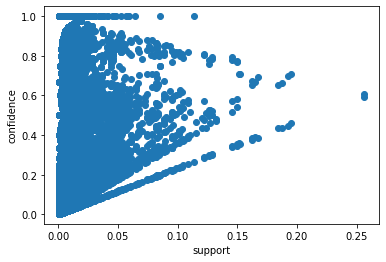

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(rules_lift.support,rules_lift.confidence);plt.xlabel("support");plt.ylabel("confidence")

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='confidence'>

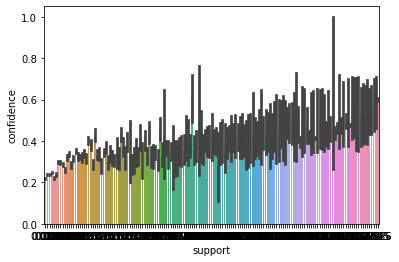

In [16]:
sns.barplot(rules_lift.support,rules_lift.confidence,data=book)

In [17]:
rules_confi=association_rules(frequent_patterns,metric='confidence',min_threshold=0.7)
rules_confi

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
2,(ItalCook),(ChildBks),0.1135,0.4230,0.0850,0.748899,1.770446,0.036990,2.297877
3,(ItalAtlas),(ChildBks),0.0370,0.4230,0.0285,0.770270,1.820970,0.012849,2.511647
4,(ItalArt),(ChildBks),0.0485,0.4230,0.0360,0.742268,1.754771,0.015484,2.238760
...,...,...,...,...,...,...,...,...,...
12978,"(ArtBks, ItalCook, DoItYBks, Florence, ItalAtlas)","(YouthBks, CookBks, ChildBks, RefBks, GeogBks,...",0.0010,0.0055,0.0010,1.000000,181.818182,0.000994,inf
12979,"(ArtBks, DoItYBks, Florence, ItalAtlas, GeogBks)","(YouthBks, ItalCook, CookBks, ChildBks, RefBks...",0.0010,0.0085,0.0010,1.000000,117.647059,0.000991,inf
12980,"(ItalCook, DoItYBks, Florence, ItalAtlas, Ital...","(YouthBks, ArtBks, CookBks, ChildBks, RefBks, ...",0.0010,0.0225,0.0010,1.000000,44.444444,0.000978,inf
12981,"(DoItYBks, Florence, ItalAtlas, GeogBks, ItalArt)","(YouthBks, ArtBks, ItalCook, CookBks, ChildBks...",0.0010,0.0135,0.0010,1.000000,74.074074,0.000986,inf


In [18]:
rules_confi.sort_values('confidence',ascending=False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6491,"(YouthBks, DoItYBks, Florence, ItalAtlas, RefB...",(ArtBks),0.0015,0.2410,0.0015,1.0,4.149378,0.001138,inf
5121,"(ArtBks, ItalCook, DoItYBks, ChildBks, RefBks,...",(CookBks),0.0080,0.4310,0.0080,1.0,2.320186,0.004552,inf
8429,"(ArtBks, CookBks, DoItYBks, ChildBks, Florence...",(RefBks),0.0010,0.2145,0.0010,1.0,4.662005,0.000785,inf
8430,"(ArtBks, CookBks, DoItYBks, Florence, ItalAtla...",(ChildBks),0.0010,0.4230,0.0010,1.0,2.364066,0.000577,inf
8431,"(ArtBks, DoItYBks, ChildBks, Florence, ItalAtl...",(CookBks),0.0010,0.4310,0.0010,1.0,2.320186,0.000569,inf
8432,"(ArtBks, CookBks, DoItYBks, Florence, ItalAtla...","(RefBks, ChildBks)",0.0010,0.1515,0.0010,1.0,6.600660,0.000849,inf
8433,"(ArtBks, DoItYBks, ChildBks, Florence, ItalAtl...","(RefBks, CookBks)",0.0010,0.1525,0.0010,1.0,6.557377,0.000848,inf
8434,"(ArtBks, DoItYBks, Florence, ItalAtlas, RefBks...","(CookBks, ChildBks)",0.0010,0.2560,0.0010,1.0,3.906250,0.000744,inf
8435,"(ArtBks, DoItYBks, Florence, ItalAtlas, GeogBks)","(RefBks, CookBks, ChildBks)",0.0010,0.1225,0.0010,1.0,8.163265,0.000878,inf
8436,"(ArtBks, CookBks, DoItYBks, Florence, RefBks, ...",(ChildBks),0.0010,0.4230,0.0010,1.0,2.364066,0.000577,inf


Text(0, 0.5, 'confidence')

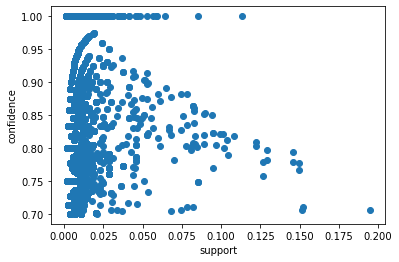

In [19]:
plt.scatter(rules_confi.support,rules_confi.confidence);plt.xlabel("support");plt.ylabel("confidence")

In [20]:
#NOW WE CHANGING min_support VALUE IN APRIORI ALGORITHM
frequent_patterns1=apriori(book,min_support=0.015,use_colnames=True)
frequent_patterns1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
375,0.0165,"(ArtBks, ItalCook, CookBks, DoItYBks, ChildBks..."
376,0.0185,"(ArtBks, ItalCook, CookBks, DoItYBks, ChildBks..."
377,0.0185,"(ArtBks, ItalCook, CookBks, ChildBks, GeogBks,..."
378,0.0165,"(YouthBks, ArtBks, CookBks, DoItYBks, RefBks, ..."


In [21]:
rules_lift1=association_rules(frequent_patterns1,metric='lift',min_threshold=0.7)
rules_lift1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
5213,(ItalCook),"(ArtBks, CookBks, DoItYBks, GeogBks, ItalArt)",0.1135,0.0155,0.015,0.132159,8.526361,0.013241,1.134424
5214,(CookBks),"(ArtBks, ItalCook, DoItYBks, GeogBks, ItalArt)",0.4310,0.0150,0.015,0.034803,2.320186,0.008535,1.020517
5215,(DoItYBks),"(ArtBks, ItalCook, CookBks, GeogBks, ItalArt)",0.2820,0.0240,0.015,0.053191,2.216312,0.008232,1.030831
5216,(GeogBks),"(ArtBks, ItalCook, CookBks, DoItYBks, ItalArt)",0.2760,0.0250,0.015,0.054348,2.173913,0.008100,1.031034


In [22]:
rules_lift1.sort_values('lift',ascending=False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2514,"(RefBks, ItalArt)","(ItalAtlas, ArtBks)",0.0200,0.0180,0.0165,0.825000,45.833333,0.016140,5.611429
2515,"(ItalAtlas, ArtBks)","(RefBks, ItalArt)",0.0180,0.0200,0.0165,0.916667,45.833333,0.016140,11.760000
767,"(RefBks, ItalArt)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
2510,"(RefBks, ArtBks, ItalArt)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
2519,(ItalAtlas),"(RefBks, ArtBks, ItalArt)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
770,(ItalAtlas),"(RefBks, ItalArt)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
4277,"(RefBks, ItalCook)","(CookBks, ItalAtlas, GeogBks)",0.0465,0.0160,0.0150,0.322581,20.161290,0.014256,1.452571
4272,"(CookBks, ItalAtlas, GeogBks)","(RefBks, ItalCook)",0.0160,0.0465,0.0150,0.937500,20.161290,0.014256,15.256000
3461,"(CookBks, ItalAtlas, ChildBks)","(RefBks, ItalCook)",0.0225,0.0465,0.0200,0.888889,19.115890,0.018954,8.581500
3468,"(RefBks, ItalCook)","(CookBks, ItalAtlas, ChildBks)",0.0465,0.0225,0.0200,0.430108,19.115890,0.018954,1.715236


In [23]:
rules_lift1.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000,5218.000000
mean,0.131119,0.131119,0.030766,0.371369,3.545439,0.018573,inf
std,0.108654,0.108654,0.022057,0.251726,2.825739,0.010639,NaN
min,0.015000,0.015000,0.015000,0.034803,0.949588,-0.001354,0.983690
25%,0.048500,0.048500,0.017500,0.158625,2.220664,0.011739,1.120290
50%,0.101000,0.101000,0.024000,0.315926,2.682563,0.015438,1.293866
75%,0.187500,0.187500,0.033500,0.532609,3.324675,0.021744,1.719500
max,0.431000,0.431000,0.256000,1.000000,45.833333,0.078844,inf


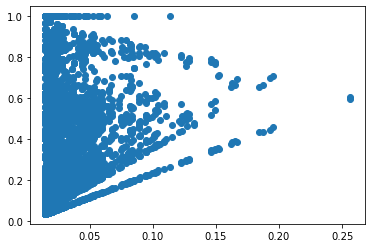

In [24]:
plt.scatter(rules_lift1.support,rules_lift1.confidence)

In [25]:
rules_confi1=association_rules(frequent_patterns1,metric='confidence',min_threshold=0.7)
rules_confi1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
2,(ItalCook),(ChildBks),0.1135,0.4230,0.0850,0.748899,1.770446,0.036990,2.297877
3,(ItalAtlas),(ChildBks),0.0370,0.4230,0.0285,0.770270,1.820970,0.012849,2.511647
4,(ItalArt),(ChildBks),0.0485,0.4230,0.0360,0.742268,1.754771,0.015484,2.238760
...,...,...,...,...,...,...,...,...,...
623,"(ItalCook, CookBks, DoItYBks, GeogBks, ItalArt)",(ArtBks),0.0150,0.2410,0.0150,1.000000,4.149378,0.011385,inf
624,"(GeogBks, DoItYBks, ArtBks, ItalArt)","(CookBks, ItalCook)",0.0165,0.1135,0.0150,0.909091,8.009612,0.013127,9.751500
625,"(GeogBks, DoItYBks, ItalCook, ItalArt)","(CookBks, ArtBks)",0.0150,0.1670,0.0150,1.000000,5.988024,0.012495,inf
626,"(CookBks, DoItYBks, GeogBks, ItalArt)","(ArtBks, ItalCook)",0.0155,0.0565,0.0150,0.967742,17.128176,0.014124,29.248500


In [26]:
rules_confi1.sort_values('confidence',ascending=False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
314,"(RefBks, ArtBks, ItalCook)",(CookBks),0.0235,0.431,0.0235,1.0,2.320186,0.013371,inf
155,"(YouthBks, ChildBks, ItalArt)",(ArtBks),0.0175,0.241,0.0175,1.0,4.149378,0.013283,inf
435,"(GeogBks, DoItYBks, ChildBks, ItalCook)",(CookBks),0.0270,0.431,0.0270,1.0,2.320186,0.015363,inf
431,"(CookBks, DoItYBks, ChildBks, ItalArt)",(ArtBks),0.0200,0.241,0.0200,1.0,4.149378,0.015180,inf
427,"(ChildBks, DoItYBks, ArtBks, ItalCook)",(CookBks),0.0285,0.431,0.0285,1.0,2.320186,0.016217,inf
421,"(RefBks, DoItYBks, ChildBks, ItalCook)",(CookBks),0.0225,0.431,0.0225,1.0,2.320186,0.012802,inf
413,"(RefBks, YouthBks, ItalCook, GeogBks)",(ChildBks),0.0170,0.423,0.0170,1.0,2.364066,0.009809,inf
406,"(YouthBks, ChildBks, ItalCook, GeogBks)",(CookBks),0.0300,0.431,0.0300,1.0,2.320186,0.017070,inf
402,"(ItalArt, YouthBks, ChildBks, CookBks)",(ArtBks),0.0150,0.241,0.0150,1.0,4.149378,0.011385,inf
398,"(ChildBks, YouthBks, ArtBks, ItalCook)",(CookBks),0.0255,0.431,0.0255,1.0,2.320186,0.014509,inf


Text(0, 0.5, 'confidence')

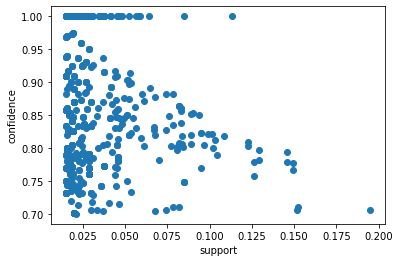

In [27]:
plt.scatter(rules_confi1.support,rules_confi1.confidence);plt.xlabel("support");plt.ylabel("confidence")

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='confidence'>

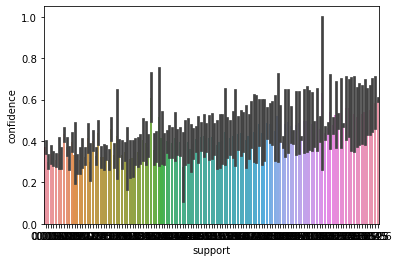

In [35]:
sns.barplot(rules_lift1.support,rules_lift1.confidence,data=book)